# Лабораторная работа №1

## Задание 1-2
#### Загрузка данных

In [1]:
import pandas as pd

df = pd.read_csv('vine.dat', header=None)
df.columns =['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Class']
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Задание 3
#### Стандартизация

In [2]:
from sklearn import preprocessing
import numpy as np

In [3]:
Columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol']

scaler_std = preprocessing.StandardScaler()
x = scaler_std.fit_transform(df[Columns])
df[Columns] = x
df

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,5
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,6
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,6
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,5


## Задание 4
#### Делим на обучающую и тестовую выборки (7/3)
###### *Валидационная входит в обучающую и составляет 2 части

In [4]:
col = ['index'] + Columns + ['Class']

In [5]:
from sklearn.model_selection import train_test_split

y = df['Class']
train_table, test_table = train_test_split(df, train_size = 0.7)
train_class, test_class = train_test_split(y, train_size = 0.7)

train_table = train_table.reset_index()
test_table = test_table.reset_index()
train_class = train_class
test_class = test_class

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

print('train_table:')
df_train_table

train_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,866,-0.873078,-0.211283,-0.261762,-0.169427,-0.349975,-0.274931,-0.683222,-1.254372,0.640715,1.014147,0.823232,6
1,1520,-1.045437,0.012176,-1.083370,-0.382271,-0.520005,1.255161,-0.075043,-0.984065,0.446337,1.014147,-0.115441,6
2,1390,-1.332702,-0.211283,-1.391472,-0.169427,-0.413736,-0.083669,-0.409542,-2.028192,1.742192,-0.402167,1.949639,6
3,1288,-0.758172,0.403229,0.149042,1.391424,-0.413736,0.394484,1.931949,1.268493,-0.072005,3.020591,-0.209308,5
4,1169,-0.413454,-0.155419,0.097691,-0.169427,-0.031169,-1.039977,-0.987312,-0.915164,0.057580,-0.225128,1.010966,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,1287,-0.183641,0.403229,-0.980669,0.043416,-0.668781,-1.231239,-1.200175,-2.059993,-0.590348,-1.700455,2.418975,5
1115,1063,1.080326,-1.328579,1.946308,-0.098479,-0.264960,-0.944346,-0.896085,-0.581255,-0.590348,-0.166115,1.292568,6
1116,570,1.827215,-0.993390,1.124700,0.540051,-0.371229,-0.561823,-0.287906,1.883309,0.057580,1.486251,0.541630,6
1117,979,2.229387,-0.434742,1.124700,-0.807957,-0.264960,-1.231239,-1.230584,0.081262,-1.173483,-0.166115,-0.021574,5


In [6]:
print('test_table:')
df_test_table

test_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,354,-1.275249,-1.775497,0.662546,-0.807957,-0.456244,2.354915,3.604442,-2.939816,-0.395969,-0.402167,1.386435,6
1,1029,-0.356000,0.291499,-1.340122,-0.524166,0.011338,-0.370562,-0.865676,-0.565355,0.057580,-0.579207,0.072294,7
2,815,1.425044,-0.434742,0.303093,-0.027532,0.245129,0.394484,-0.257497,0.759680,-0.460762,0.305990,0.353895,5
3,1290,-0.413454,1.185336,-1.391472,-0.453218,0.266383,-0.944346,-1.048130,-0.814461,0.316751,-0.402167,0.541630,5
4,798,0.620701,-0.155419,0.354443,0.752894,-0.116184,-1.039977,-0.987312,1.035287,-0.136798,-0.815259,0.260028,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1213,0.735607,-0.825796,0.765247,-0.453218,-0.349975,-1.039977,-1.017721,-0.083042,-1.043897,0.542042,0.072294,6
476,1069,-0.183641,0.514959,0.405794,0.185312,-0.031169,1.159531,0.168229,0.134264,-0.007213,-0.225128,0.353895,5
477,1523,-0.873078,-0.267148,-0.107711,-0.382271,-0.243707,1.255161,0.441909,-0.766760,0.187166,-0.343154,-0.021574,5
478,976,-0.643266,-0.658202,0.149042,-0.311323,-0.094931,1.828946,0.776408,0.134264,0.835093,-0.815259,-0.960246,5


## Задание 5
#### Деревья решений

In [7]:
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


def MakingTree(crit, alpha):
    clf = tree.DecisionTreeClassifier(criterion = crit, ccp_alpha = alpha)
    clf.fit(train_table[Columns], train_table[['Class']])
    

    tree.plot_tree(clf,filled = True, rounded = True)
    plt.savefig('tree.pdf') ##для сохранение в пдф
    plt.show
    
    # Классифицируем тестовую выборку и находим процент совпадения
    print(clf.score(test_table[Columns], test_table[['Class']]))
    
    res = clf.predict(test_table[Columns])
    print("Accuracy = ", accuracy_score(test_class, res))
    print("Precision = ", precision_score(test_class, res, average='weighted', zero_division=1))
    print("Recall = ", recall_score(test_class, res, average='weighted'))

## По Джинни 

0.5708333333333333
Accuracy =  0.41041666666666665
Precision =  0.5171410286096532
Recall =  0.41041666666666665


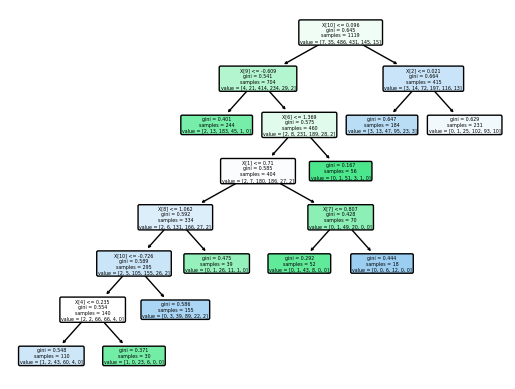

In [8]:
MakingTree('gini', 0.005)

0.5291666666666667
Accuracy =  0.3625
Precision =  0.3887216465348446
Recall =  0.3625


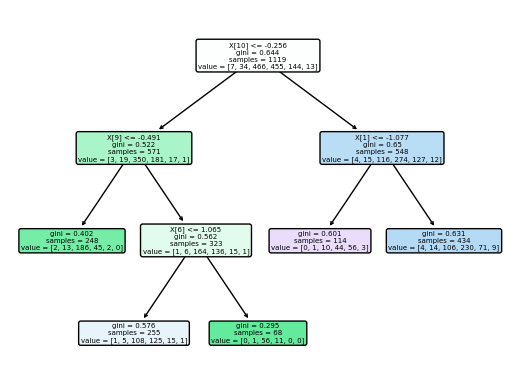

In [82]:
MakingTree('gini', 0.01)

0.5666666666666667
Accuracy =  0.42916666666666664
Precision =  0.5167549019607843
Recall =  0.42916666666666664
Выбираем!


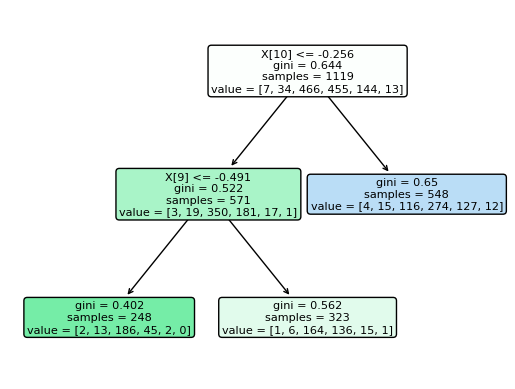

In [83]:
MakingTree('gini', 0.014)
print("Выбираем!")

0.5666666666666667
Accuracy =  0.42916666666666664
Precision =  0.5167549019607843
Recall =  0.42916666666666664


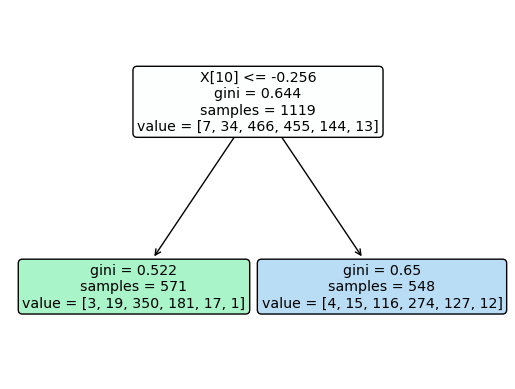

In [84]:
MakingTree('gini', 0.02)

0.5666666666666667
Accuracy =  0.42916666666666664
Precision =  0.5167549019607843
Recall =  0.42916666666666664


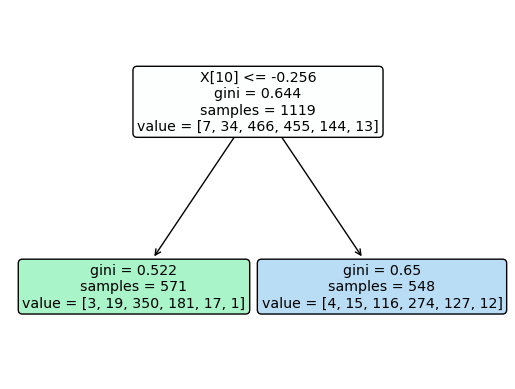

In [85]:
MakingTree('gini', 0.03)

0.4479166666666667
Accuracy =  0.4354166666666667
Precision =  0.7541710069444444
Recall =  0.4354166666666667


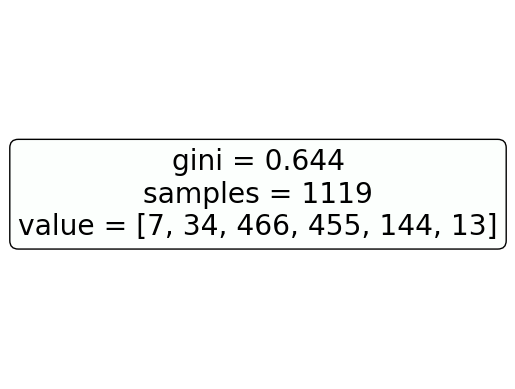

In [86]:
MakingTree('gini', 0.2)

0.4479166666666667
Accuracy =  0.4354166666666667
Precision =  0.7541710069444444
Recall =  0.4354166666666667


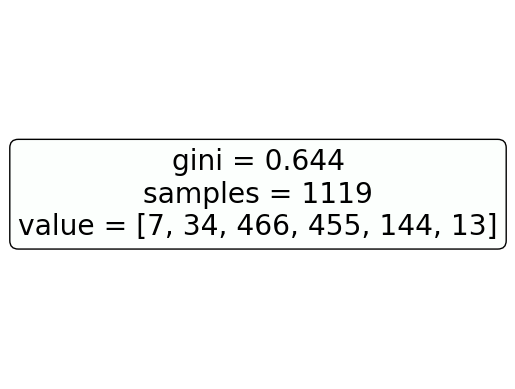

In [87]:
MakingTree('gini', 0.8)

## По энтропии

0.56875
Accuracy =  0.38125
Precision =  0.38319528789923524
Recall =  0.38125


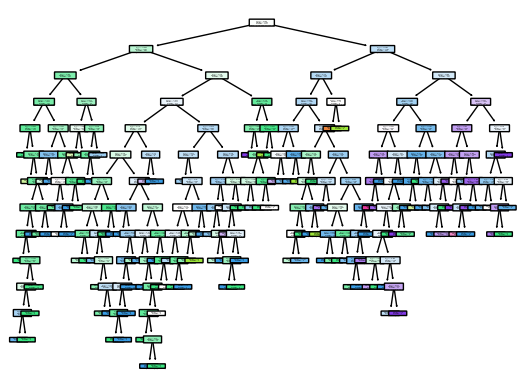

In [88]:
MakingTree('entropy', 0.005)

0.55
Accuracy =  0.38333333333333336
Precision =  0.4158050244995878
Recall =  0.38333333333333336


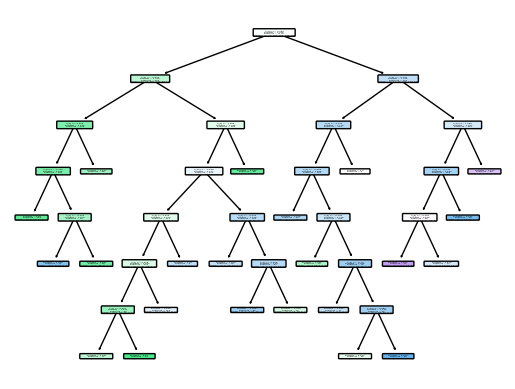

In [89]:
MakingTree('entropy', 0.01)

0.58125
Accuracy =  0.37916666666666665
Precision =  0.42313261351052045
Recall =  0.37916666666666665


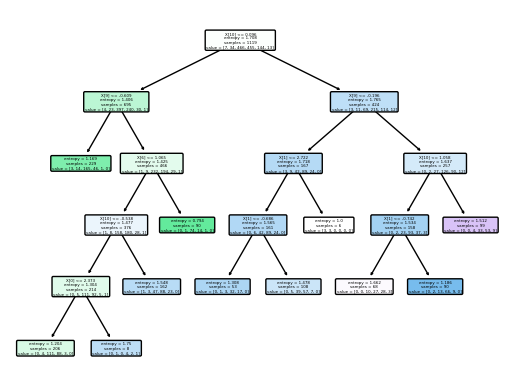

In [90]:
MakingTree('entropy', 0.015)

0.575
Accuracy =  0.37916666666666665
Precision =  0.4230768447076722
Recall =  0.37916666666666665


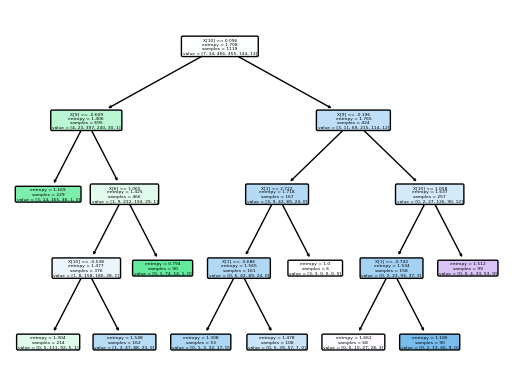

In [91]:
MakingTree('entropy', 0.02)

0.525
Accuracy =  0.36666666666666664
Precision =  0.39075350288202115
Recall =  0.36666666666666664


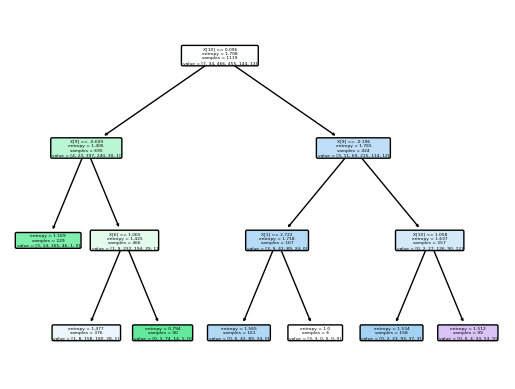

In [92]:
MakingTree('entropy', 0.025)

0.5270833333333333
Accuracy =  0.4
Precision =  0.4937326388888889
Recall =  0.4


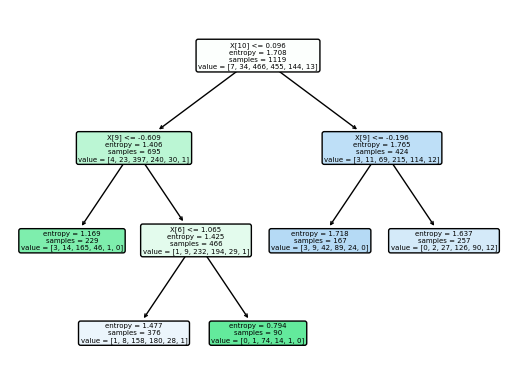

In [93]:
MakingTree('entropy', 0.03)

0.56875
Accuracy =  0.4083333333333333
Precision =  0.4974247685185185
Recall =  0.4083333333333333


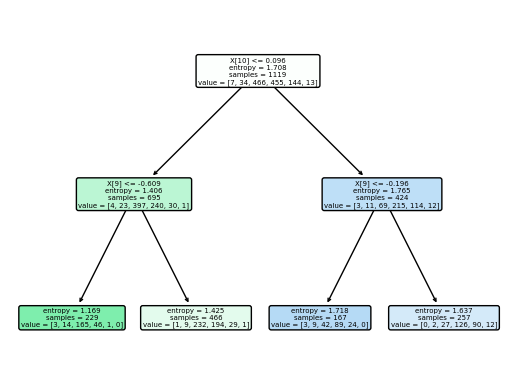

In [94]:
MakingTree('entropy', 0.035)

0.56875
Accuracy =  0.4083333333333333
Precision =  0.4974247685185185
Recall =  0.4083333333333333
Выбираем!


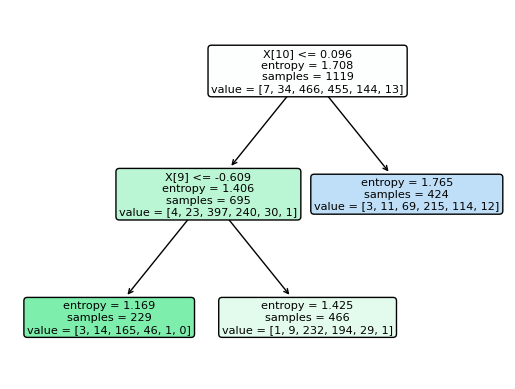

In [101]:
MakingTree('entropy', 0.037)
print("Выбираем!")

0.4479166666666667
Accuracy =  0.4354166666666667
Precision =  0.7541710069444444
Recall =  0.4354166666666667


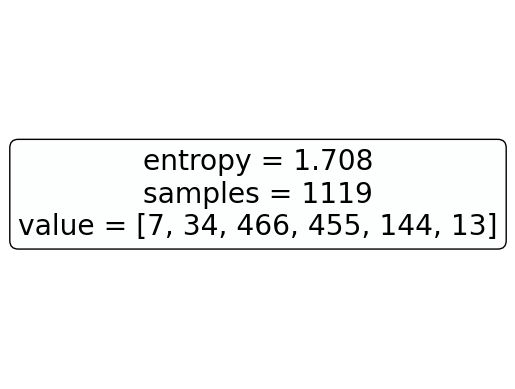

In [95]:
MakingTree('entropy', 0.2)

0.4479166666666667
Accuracy =  0.4354166666666667
Precision =  0.7541710069444444
Recall =  0.4354166666666667


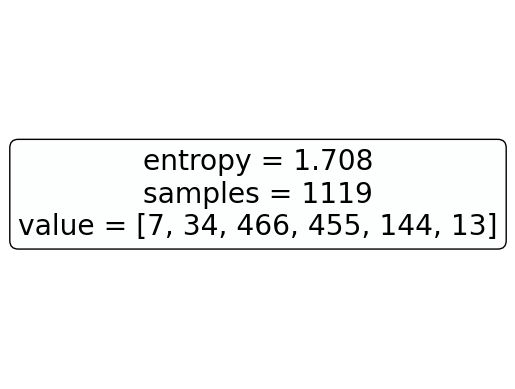

In [96]:
MakingTree('entropy', 0.8)

#### Для энтропии наилучшим дерево является при альфа = 0.037 с 56,88% со следующими параметрами эффективности:  
##### Accuracy =  0.4083
##### Precision =  0.4974
##### Recall =  0.4083

#### Для коэффициента Джинни наилучшим дерево является при альфа = 0.014 с 56,67% со следующими параметрами эффективности: 
##### Accuracy =  0.4292
##### Precision =  0.5168
##### Recall =  0.4292

# Задание 6
#### SVM-классификатор

In [ ]:
gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

In [ ]:
#Не запускать!!!
from sklearn import svm


for krl in ['linear', 'poly', 'rbf', 'sigmoid']:
    best = [0]
    for gamma in gammas:
        for coef0 in coef0s:
            for degree in degrees:
                for C in Cs:
                    clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                            degree = degree, C = C)
                    clf.fit(train_table[Columns], 
                            train_table['Class'])
                    res = clf.predict(test_table[Columns])
                    score = clf.score(test_table[Columns],
                                      test_table[['Class']])
                    if score > best[0]:
                        best = [score, gamma, coef0, degree, C]
                        
    print(krl, best)

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

krl ='linear'
best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='weighted', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='weighted'))

linear [0.5958333333333333, 'scale', 0, 2, 0.1]
Accuracy =  0.425
Precision =  0.5274945175438597
Recall =  0.425


In [10]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


gammas = ['scale', 'auto', 1, 10, 0.1, 20, 0.01]
coef0s = [0, 1, 2, 5, 10, 0.1, 0.01]
degrees = [2, 3, 4, 5]
Cs = [0.001, 0.01, 0.1, 0.5, 1, 2, 10, 20]

krl ='sigmoid'
best = [0]
for gamma in gammas:
    for coef0 in coef0s:
        for degree in degrees:
            for C in Cs:
                clf = svm.SVC(kernel = krl, gamma = gamma, coef0 = coef0,
                              degree = degree, C = C)
                clf.fit(train_table[Columns], 
                        train_table['Class'])
                res = clf.predict(test_table[Columns])
                score = clf.score(test_table[Columns],
                                  test_table[['Class']])
                if score > best[0]:
                    best = [score, gamma, coef0, degree, C]
                        
print(krl, best)
clf = svm.SVC(kernel = krl, gamma = best[1], coef0 = best[2], degree = best[3], C = best[4])
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='weighted', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='weighted'))

sigmoid [0.5979166666666667, 0.01, 0, 2, 2]
Accuracy =  0.41875
Precision =  0.5221250694637399
Recall =  0.41875


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_class, res))

[[  0   0   4   1   0   0]
 [  0   0   9   6   0   0]
 [  0   0 101 105   0   0]
 [  0   0  89 100   0   0]
 [  0   0  30  30   0   0]
 [  0   0   3   2   0   0]]


In [12]:
df['Class'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Наилучшие значения параметров:
####    linear [0.5958333, 'scale', 0, 2, 0.01]:
######      Accuracy =  0.425
######      Precision =  0.527
######      Recall =  0.425
####    poly -
####    rbf -
####    sigmoid [0.5979166, 0.01, 0, 2, 2]
######      Accuracy =  0.4188
######      Precision =  0.5221
######      Recall =  0.4188

# Задание 7
#### Выбираем наилучшее
###### Тестовой становится валидационная выборка, составляющая 2 части из 7 всего

In [13]:
from sklearn.model_selection import train_test_split


train_table, test_table = train_test_split(df_train_table, train_size = 5/7)
train_class, test_class = train_test_split(train_class, train_size = 5/7)

train_table = train_table.reset_index()
test_table = test_table.reset_index()

df_test_table = pd.DataFrame(test_table, columns = col)
df_train_table = pd.DataFrame(train_table, columns = col)

print('train_table:')
df_train_table

train_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,602,-0.356000,1.716051,-1.391472,0.043416,-0.137438,-0.944346,-0.987312,0.399270,-0.072005,-0.815259,-1.054113,5
1,250,1.425044,-1.160984,0.867948,-0.666062,-0.520005,0.011961,-0.287906,0.929284,-0.590348,0.719081,-0.397043,6
2,716,-0.183641,-0.546472,0.457144,-0.169427,-0.264960,-0.561823,0.046593,0.452272,0.187166,-1.169337,-0.960246,5
3,920,0.735607,-0.658202,0.508495,-0.169427,0.075099,-0.561823,-0.713631,0.590075,-0.460762,-0.579207,0.072294,5
4,235,-0.643266,0.570823,-1.391472,-0.453218,0.202621,-0.179300,-0.257497,0.001760,0.381544,-0.461180,-1.335715,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,722,-0.413454,-0.602337,-0.980669,0.114364,-0.073677,-0.083669,0.046593,0.028261,-0.655141,-0.402167,-0.397043,5
795,476,0.563248,-1.440308,0.713897,-0.382271,0.075099,-0.944346,-0.926494,0.664277,-0.201591,0.246977,-0.678644,5
796,881,-0.413454,1.045674,-1.391472,-0.311323,-0.413736,1.350792,-0.348724,-0.750859,1.094265,-0.048089,0.917099,6
797,182,-0.643266,1.129471,-1.288771,-0.027532,-0.243707,0.011961,-0.135861,0.240266,0.835093,-0.815259,-1.054113,5


In [14]:
print('test_table:')
df_test_table

test_table:


,index,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Class
0,567,0.218530,0.961877,-0.159061,-0.027532,2.944352,-1.039977,-0.956903,1.247292,0.057580,-0.343154,-1.335715,6
1,437,1.597403,-0.434742,2.357111,0.469103,-0.456244,-0.944346,-0.744040,0.982285,-0.914312,0.010924,0.729364,6
2,1045,-0.815625,-0.490607,-1.391472,-0.807957,-0.371229,1.542054,-0.257497,-1.254372,0.057580,-0.461180,0.917099,6
3,682,0.103624,-0.378878,0.200392,-0.204901,-0.201199,1.542054,0.350683,0.664277,0.122373,-0.697233,-0.584777,5
4,1271,-0.585813,-0.490607,-0.364463,-0.666062,-0.817557,0.777007,0.533136,-1.720784,0.446337,-0.520193,1.198701,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,382,-0.011282,-1.496173,0.765247,-0.382271,-0.158692,-0.466193,-0.591995,0.346269,-0.655141,0.837107,-0.960246,6
316,649,-0.930531,-0.602337,-0.005010,4.300284,-0.413736,0.777007,3.087490,-1.031767,-0.979104,-0.520193,0.823232,6
317,651,0.850513,1.967442,-0.107711,-0.027532,0.351398,1.828946,3.300352,2.254318,0.640715,0.069937,0.729364,5
318,1365,-0.298547,-0.155419,-0.929318,-0.240375,0.585188,-0.561823,-0.135861,0.187265,-0.849519,-0.225128,-0.866379,5


### Деревья принятия решений
#### 1) По коэф. Джини

0.525
Accuracy =  0.390625
Precision =  0.7608100711548987
Recall =  0.19545295149035652


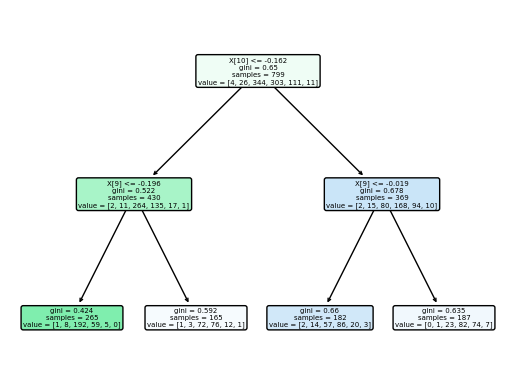

In [24]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', ccp_alpha = 0.014)
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
# Классифицируем тестовую выборку и находим процент совпадения
print(clf.score(test_table[Columns], test_table[['Class']]))
    
res = clf.predict(test_table[Columns])
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

#### 2) По энтропии

0.49375
Accuracy =  0.390625
Precision =  0.7667067535919995
Recall =  0.20302746931618937


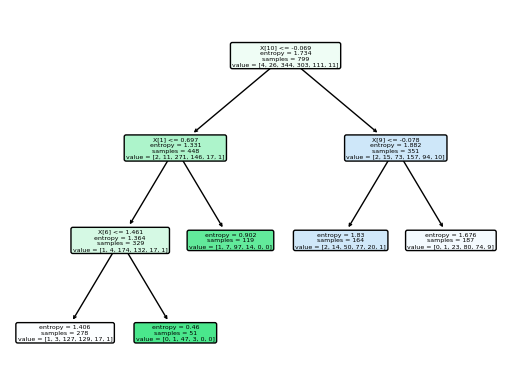

In [25]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.037) 
clf.fit(train_table[Columns], train_table[['Class']])
    
tree.plot_tree(clf,filled = True, rounded = True)
plt.savefig('tree.pdf') ##для сохранение в пдф
plt.show
    
# Классифицируем тестовую выборку и находим процент совпадения
print(clf.score(test_table[Columns], test_table[['Class']]))
    
res = clf.predict(test_table[Columns])
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

### SVM-классификаторы

In [26]:
clf = svm.SVC(kernel = 'linear', gamma ='scale', coef0 = 0, degree = 2, C = 0.1)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print(clf.score(test_table[Columns], test_table[['Class']]))    
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

0.578125
Accuracy =  0.396875
Precision =  0.7571969696969697
Recall =  0.19126826417299828


In [28]:
clf = svm.SVC(kernel = 'sigmoid', gamma = 0.01, coef0 = 0, degree = 2, C = 2)
clf.fit(train_table[Columns], train_table['Class'])
res = clf.predict(test_table[Columns])

print(clf.score(test_table[Columns], test_table[['Class']]))    
print("Accuracy = ", accuracy_score(test_class, res))
print("Precision = ", precision_score(test_class, res, average='macro', zero_division=1))
print("Recall = ", recall_score(test_class, res, average='macro'))

0.584375
Accuracy =  0.403125
Precision =  0.7589645407043994
Recall =  0.193395675043834


### Таким образом, наилучшим классификатором оказался сигмоид(gamma = 0.01, coef0 = 0, degree = 2, C = 2) с процентом совпадения 58,44%